<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-01-19-SVM/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import matplotlib.pyplot as plt

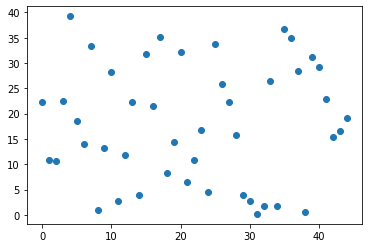

In [57]:
x1 = np.arange(45)
x2 = np.random.rand(x1.size)*40

plt.scatter(x1, x2)

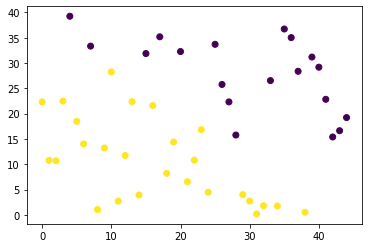

In [58]:
y = np.where(x1+x2<40, 1, 0)

plt.scatter(x1, x2, c = y)

In [59]:
X = np.dstack([x1, x2])[0]
X.shape

(45, 2)

In [60]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

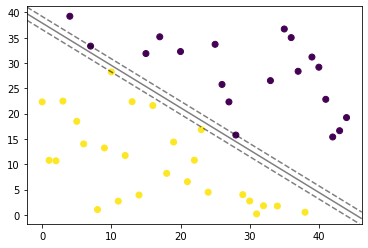

In [63]:
from sklearn.svm import SVC

svc = SVC(kernel= 'linear', C = 1)
svc.fit(X, y)

plt.scatter(x1, x2, c = svc.predict(X))
plot_svc_decision_function(svc)

In [39]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, noise=0.1, factor=0.3)

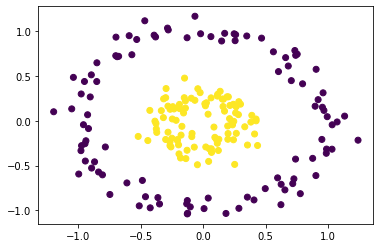

In [40]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [41]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')

svc.fit(X, y)

SVC(kernel='linear')

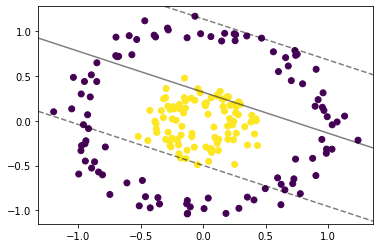

In [42]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plot_svc_decision_function(svc)

In [53]:
from sklearn.svm import SVC

svc = SVC(kernel = 'poly', degree = 10)

svc.fit(X, y)

SVC(degree=10, kernel='poly')

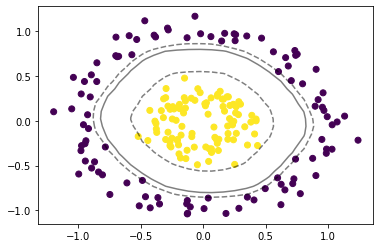

In [54]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plot_svc_decision_function(svc)

In [45]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')

svc.fit(X, y)

SVC()

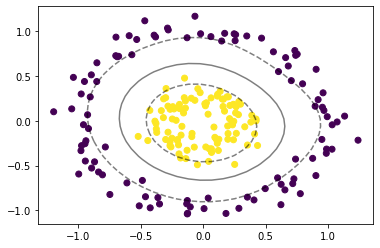

In [46]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plot_svc_decision_function(svc)